# Load and clean data

In [1]:
#Import necessary packages

#Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Files
import tkinter as tk
from tkinter import filedialog

#Reading files
import re #regex module

### Load data

In [2]:
#Load files using tkinter and return as a list
def load_files():
    #Initialize tkinter root window (hidden)
    root = tk.Tk()
    root.withdraw() #Hide the main window

    #Open file dialog for multiple file selection
    file_paths = filedialog.askopenfilenames(
        title = "Select files",
        filetypes = (("CSV files", "*.csv"), ("All files", "*.*"))
    )

    #Return an empty list if no files selected
    if not file_paths:
        print("No files selected")
        return []
        
    #Return list of file paths
    return list(file_paths)

In [3]:
#Load multiple files into a list where each list item is the filepath
#filepaths = load_files()

In [4]:
#Check to make sure filepaths are in variable
filepaths = ['/Users/kyli/Library/CloudStorage/OneDrive-UniversityofArizona/Neurotrauma & Social Impact/Projects/Misc/ObenhausLifshitz_Cohort01_PostInjury_2Slppct.csv',
 '/Users/kyli/Library/CloudStorage/OneDrive-UniversityofArizona/Neurotrauma & Social Impact/Projects/Misc/ObenhausLifshitz_Cohort01_Baseline_2Slppct.csv']

In [5]:
#Create a baseline df
baseline_df = pd.read_csv(filepaths[1])

In [6]:
#Create a post-injury df
postinjury_df = pd.read_csv(filepaths[0])

In [7]:
#Check one against the Excel files to make sure correct df is saved to correct variable name
baseline_df

,Unnamed: 0,M1,M3,Empty,Empty.1,Empty.2,M2,Empty.3,M4,NA,NA.1,Empty.4,Empty.5,Empty.6,Empty.7,Empty.8,Empty.9
0,2024-12-06 15:00:00,4.39,38.28,0.0,14.83,0,50.11,52.17,75.83,58.00,70.00,56.89,36.11,34.44,11.44,21.72,93.56
1,2024-12-06 16:00:00,11.17,55.11,0.0,21.11,0,93.22,90.83,91.61,90.94,92.28,88.89,81.89,84.56,16.39,24.56,100.00
2,2024-12-06 17:00:00,6.17,33.72,0.0,10.61,0,66.17,63.17,70.78,72.78,56.33,48.78,33.28,39.28,12.78,17.50,99.39
3,2024-12-06 18:00:00,2.06,23.22,0.0,4.72,0,58.61,18.50,23.17,57.06,77.06,64.11,46.17,52.72,7.56,10.72,99.67
4,2024-12-06 19:00:00,0.00,0.00,0.0,0.00,0,7.22,6.78,25.67,21.50,42.72,21.50,12.28,15.11,10.22,11.72,98.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2024-12-10 07:00:00,4.39,27.94,0.0,1.67,0,82.39,87.50,90.11,62.72,29.33,22.44,8.67,13.83,3.44,7.22,89.89
89,2024-12-10 08:00:00,1.56,12.78,0.0,1.28,0,77.00,64.78,74.83,65.72,2.06,9.06,2.89,6.44,6.06,8.94,91.56
90,2024-12-10 09:00:00,3.44,22.67,0.0,0.72,0,85.67,60.61,62.83,73.78,70.17,67.39,61.78,63.00,7.94,14.00,99.28
91,2024-12-10 10:00:00,2.44,10.22,0.0,0.83,0,60.11,62.50,83.39,85.83,70.33,65.33,57.11,59.94,10.56,17.72,97.39


In [8]:
#Check the other against the first df to make sure columns are the same
postinjury_df

,Unnamed: 0,M1,M3,Empty,Empty.1,Empty.2,M2,Empty.3,M4,Empty.4,Empty.5,Empty.6,Empty.7,Empty.8,Empty.9,Empty.10,Empty.11
0,2024-12-10 13:00:00,5.72,5.28,0.00,31.00,0.0,63.28,69.06,93.06,68.72,59.72,53.44,29.00,55.67,32.33,42.83,97.78
1,2024-12-10 14:00:00,2.22,29.22,0.00,37.44,0.0,74.83,61.33,66.72,60.00,51.44,38.17,34.89,46.06,23.89,51.11,96.78
2,2024-12-10 15:00:00,1.56,23.22,0.00,36.83,0.0,91.06,59.28,55.56,40.28,37.78,34.67,22.11,32.11,37.89,63.39,97.33
3,2024-12-10 16:00:00,1.78,15.83,0.00,40.61,0.0,37.83,45.83,85.39,75.22,56.17,48.94,41.00,49.17,25.83,47.67,99.00
4,2024-12-10 17:00:00,0.61,22.39,0.00,38.67,0.0,85.67,58.83,54.22,44.56,41.39,32.39,21.50,29.61,17.67,32.06,93.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-12-13 09:00:00,43.78,40.67,0.06,9.11,0.0,82.50,73.39,84.83,60.17,61.33,61.33,99.50,94.89,21.50,39.17,100.00
69,2024-12-13 10:00:00,47.61,48.67,0.00,15.56,0.0,50.33,48.72,75.50,60.33,63.17,64.56,98.78,95.17,32.94,42.72,100.00
70,2024-12-13 11:00:00,42.94,53.06,0.00,12.67,0.0,77.61,72.78,81.00,25.22,23.11,25.67,94.89,90.89,18.17,38.44,100.00
71,2024-12-13 12:00:00,34.61,38.50,0.00,8.33,0.0,68.94,78.78,82.67,46.94,45.83,47.39,98.39,88.67,16.83,27.44,100.00


### Combine dfs

Combine dfs and change them to tidy format

In [9]:
#combined_df

In [10]:
#See full display combined df
#with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(combined_df)

In [11]:
#Add a col to reflect baseline or post-injury

### Clean dfs

In [12]:
#Determine which columns are necessary
#combined_df.columns

In [13]:
#Drop columns with no animals for baseline
baseline_df = baseline_df.drop(columns=['Empty', 'Empty.1', 'Empty.2', 'Empty.3', 'Empty.4', 'NA', 'NA.1','Empty.5', 'Empty.6',
       'Empty.7', 'Empty.8', 'Empty.9'])

In [14]:
#Same for post_injury
postinjury_df = postinjury_df.drop(columns=['Empty', 'Empty.1', 'Empty.2', 'Empty.3', 'Empty.4', 'Empty.5', 'Empty.6',
       'Empty.7', 'Empty.8', 'Empty.9', 'Empty.10', 'Empty.11'])

In [15]:
#Rename mouse columns 
#baseline_df.rename(columns={'M1':'M1_baseline', 'M2':'M2_baseline', 'M3':'M3_baseline', 'M4':'M4_baseline'}, inplace=True)

In [16]:
#Rename mouse columns postinjury
#postinjury_df.rename(columns={'M1':'M1_baseline', 'M2':'M2_baseline', 'M3':'M3_baseline', 'M4':'M4_baseline'}, inplace=True)

Maybe here would be a good place to add Nan rows and then drop them so that the graphs
don't connect in a weird way when I try to visualize them on Plotly

### Get the hour

In [17]:
# May have to remove Nans later

In [18]:
#Rename datetime columns
baseline_df.rename(columns={'Unnamed: 0': 'Datetime'}, inplace=True)

In [19]:
postinjury_df.rename(columns={'Unnamed: 0': 'Datetime'}, inplace=True)

In [20]:
#Convert Datetime column to datetime type
baseline_df['Datetime'] = pd.to_datetime(baseline_df['Datetime'])

In [21]:
#Convert Datetime column to datetime type
postinjury_df['Datetime'] = pd.to_datetime(postinjury_df['Datetime'])

In [22]:
#Check df to make sure it looks normal
postinjury_df

,Datetime,M1,M3,M2,M4
0,2024-12-10 13:00:00,5.72,5.28,63.28,93.06
1,2024-12-10 14:00:00,2.22,29.22,74.83,66.72
2,2024-12-10 15:00:00,1.56,23.22,91.06,55.56
3,2024-12-10 16:00:00,1.78,15.83,37.83,85.39
4,2024-12-10 17:00:00,0.61,22.39,85.67,54.22
...,...,...,...,...,...
68,2024-12-13 09:00:00,43.78,40.67,82.50,84.83
69,2024-12-13 10:00:00,47.61,48.67,50.33,75.50
70,2024-12-13 11:00:00,42.94,53.06,77.61,81.00
71,2024-12-13 12:00:00,34.61,38.50,68.94,82.67


In [23]:
#Return the hour associated with a specific datetime cell
postinjury_df['Datetime'][0].hour

13

In [24]:
#Function to take a df create a new column called 'Hour' where each cell is the hour
# noted in the Datetime column

def hour_formatting(df):
    #Turn datetime col into list
    datetime_list = df['Datetime'].tolist()
    #Create hour list to be turned into new df col
    hour_list = []

    #Grab the hour from each datetime and add it to the hour list
    for element in datetime_list:
        hour = element.hour
        hour_list.append(hour)

    #Create new hour col in df
    #df['Hour'] = hour_list
    df['Cumulative Hour'] = range(len(df))
    return df


In [25]:
#Run hour_formatting function for both dfs
baseline_df = hour_formatting(baseline_df)
postinjury_df = hour_formatting(postinjury_df)

In [26]:
#Check
print(baseline_df)
print(postinjury_df)

              Datetime     M1     M3     M2     M4  Cumulative Hour
0  2024-12-06 15:00:00   4.39  38.28  50.11  75.83                0
1  2024-12-06 16:00:00  11.17  55.11  93.22  91.61                1
2  2024-12-06 17:00:00   6.17  33.72  66.17  70.78                2
3  2024-12-06 18:00:00   2.06  23.22  58.61  23.17                3
4  2024-12-06 19:00:00   0.00   0.00   7.22  25.67                4
..                 ...    ...    ...    ...    ...              ...
88 2024-12-10 07:00:00   4.39  27.94  82.39  90.11               88
89 2024-12-10 08:00:00   1.56  12.78  77.00  74.83               89
90 2024-12-10 09:00:00   3.44  22.67  85.67  62.83               90
91 2024-12-10 10:00:00   2.44  10.22  60.11  83.39               91
92 2024-12-10 11:00:00   0.89  15.67  90.28  77.61               92

[93 rows x 6 columns]
              Datetime     M1     M3     M2     M4  Cumulative Hour
0  2024-12-10 13:00:00   5.72   5.28  63.28  93.06                0
1  2024-12-10 14:00:00   

### Visualize with Seaborn

In [27]:
#Add a column for injury status
baseline_df['Injury status'] = 'baseline'

In [28]:
#Add column for injury status
postinjury_df['Injury status'] = 'postinjury'

In [29]:
#Melt the dfs because Seaborn prefers tidy data format
#Melting is basically turning df from wide format to tidy format

columns_to_plot = ['M1', 'M2', 'M3', 'M4']

melted_baseline = baseline_df.melt(
    id_vars =['Injury status', 'Cumulative Hour'], #column to keep fixed
    value_vars = columns_to_plot, # columns to graph - each cell in this column becomes its own row associated with the data from all other columns
    var_name = 'Mouse', #The col names become individual cells associated with each observation
    value_name = 'Value' #A new column of every single observation from all the columns we want to plot
)

melted_postinjury = postinjury_df.melt(
    id_vars = ['Injury status', 'Cumulative Hour'],
    value_vars = columns_to_plot,
    var_name = 'Mouse',
    value_name = 'Value'
)

In [30]:
#Combine
combined_df = pd.concat([melted_baseline, melted_postinjury])

In [31]:
#Scroll through the new df
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(combined_df)

    Injury status  Cumulative Hour Mouse  Value
0        baseline                0    M1   4.39
1        baseline                1    M1  11.17
2        baseline                2    M1   6.17
3        baseline                3    M1   2.06
4        baseline                4    M1   0.00
5        baseline                5    M1   0.00
6        baseline                6    M1   0.00
7        baseline                7    M1   0.33
8        baseline                8    M1   0.00
9        baseline                9    M1   0.33
10       baseline               10    M1   1.94
11       baseline               11    M1   4.22
12       baseline               12    M1   1.06
13       baseline               13    M1   0.00
14       baseline               14    M1   0.00
15       baseline               15    M1   0.00
16       baseline               16    M1   4.61
17       baseline               17    M1  11.67
18       baseline               18    M1  15.94
19       baseline               19    M1

In [33]:
#Reset index so that index goes from 0 to length of df continuously
combined_df.reset_index(drop=True, inplace = True)

In [34]:
combined_df

,Injury status,Cumulative Hour,Mouse,Value
0,baseline,0,M1,4.39
1,baseline,1,M1,11.17
2,baseline,2,M1,6.17
3,baseline,3,M1,2.06
4,baseline,4,M1,0.00
...,...,...,...,...
659,postinjury,68,M4,84.83
660,postinjury,69,M4,75.50
661,postinjury,70,M4,81.00
662,postinjury,71,M4,82.67


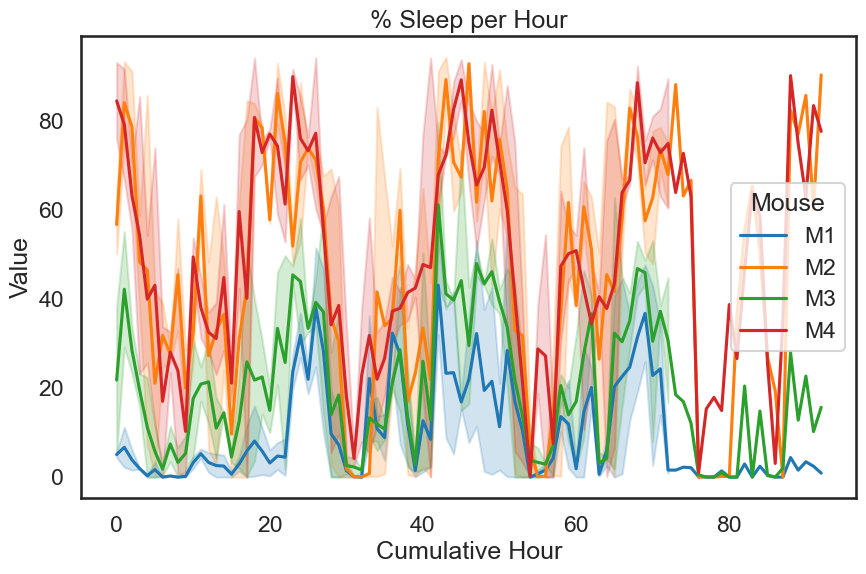

In [35]:

#Set plot style
sns.set_style("white")
sns.set_context("talk") #scaling parameter, not 100% 

'''plt.figure(figsize=(10,6))
sns.lineplot(data=melted_baseline,
             x='Cumulative Hour',
             y='Value',
             hue='Metric',
            )
plt.title('% Sleep per Hour')
plt.show()'''

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=combined_df,
             x= 'Cumulative Hour',
             y='Value',
             hue='Mouse'
            )
plt.title('% Sleep per Hour')
plt.show()

### Visualize with Plotly

In [36]:
#Set plot style
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

df = combined_df

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Hourly Percent Sleep by Mouse and Condition'),
    dcc.Graph(id='graph'),
    dcc.Checklist(
        id='checklist',
        options=[{'label': condition, 'value': condition} for condition in df['Injury status'].unique()],
        value = [df['Injury status'].unique()[0]], #Default  selected
        inline = True #Display checklist items horizontally
    ),
])

@app.callback(
    Output("graph", "figure"),
    Input('checklist', 'value'))
def update_line_chart(selected_conditions):
    mask = df['Injury status'].isin(selected_conditions)
    fig = px.line(
        df[mask],
        x= 'Cumulative Hour',
        y='Value',
        color='Mouse',
        line_group='Mouse',
        title='Hourly Sleep Percentage at Baseline and Postinjury'
    )
    fig.update_layout(
        xaxis_title = 'Cumulative Hour',
        yaxis_title = 'Percent Sleep',
        #legend title
        template = 'plotly_white',
        hovermode = 'x unified' # Unified hover for better interactivity
    )
    return fig

if __name__ == "__main__":
    app.run_server(debug=True)

Done for now - basic visualization is available.

Next steps: 

1. Decouple the graph between baseline and postinjury (most likely done by adding NaN values after the last baseline row for each mouse)

2. Change the color of the line between baseline and post-ijury so that it's obvious which line is baseline and which line is postinjury for each mouse